In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [160]:
from sklearn.preprocessing import OneHotEncoder

In [169]:
import seaborn as sns

In [31]:
import pandas as pd
data = pd.read_csv("C:/Users/Cyber/Downloads/train_titanic.csv")
data=pd.DataFrame(data)

In [34]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

sex	    Sex	
Age   	Age in years	

sibsp	# of siblings / spouses aboard the Titanic	

parch	# of parents / children aboard the Titanic	

ticket	Ticket number	

fare	Passenger fare	

cabin	Cabin number	

embarked	Port of Embarkation

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [36]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [54]:
survived_gender = data.groupby(['Sex']).agg({'Sex':'count', 'Survived':'sum'})
print(survived_gender)

        Sex  Survived
Sex                  
female  314       233
male    577       109


<BarContainer object of 2 artists>

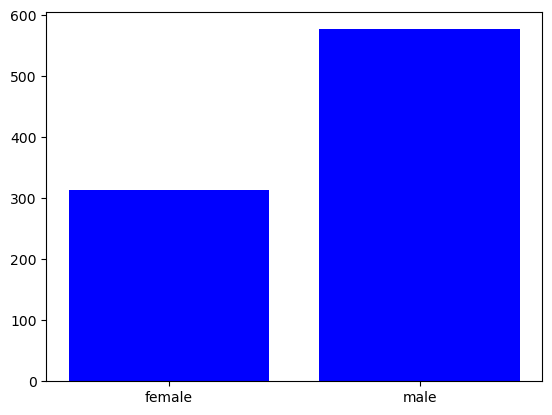

In [ ]:
plt.bar(x=survived_gender.index,height=survived_gender['Sex'].values)

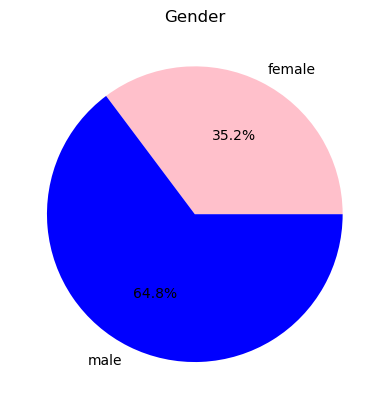

In [75]:
plt.pie(labels=survived_gender.index,x=survived_gender['Sex'],autopct='%1.1f%%',colors=['pink','blue'])
plt.title('Gender')
plt.show()


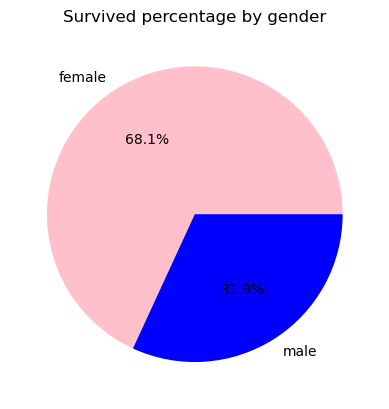

In [74]:
plt.pie(labels=survived_gender.index,x=survived_gender['Survived'],autopct='%1.1f%%',colors=['pink','blue'])
plt.title('Survived percentage by gender')
plt.show()


In [97]:
Pclass = data.groupby(['Pclass']).agg({'Pclass':'count', 'Survived':'sum'})


In [98]:
Pclass.index =['First Class','Second Class','Third Class']

<Axes: >

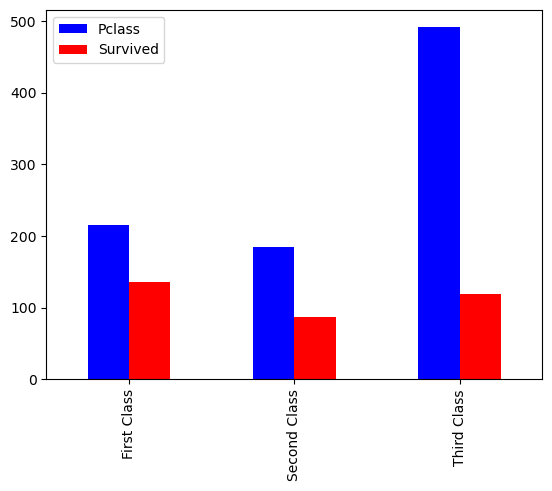

In [100]:
Pclass.plot(kind='bar', color=['blue','red'])

In [104]:
Used_data=data[['Pclass','Age','SibSp','Parch','Sex','Survived']]

In [110]:
x=Used_data.drop(columns=['Survived'])

In [111]:
y=Used_data['Survived']

In [143]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size=0.8,test_size=0.2, random_state=42)

In [144]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 331 to 102
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  712 non-null    int64  
 1   Age     572 non-null    float64
 2   SibSp   712 non-null    int64  
 3   Parch   712 non-null    int64  
 4   Sex     712 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 33.4+ KB


(array([30., 14., 10., 14.,  3., 29., 39., 65., 73., 42., 65., 62., 33.,
        47., 38., 21., 28., 21., 16., 14., 15.,  7.,  9.,  8.,  4.,  0.,
         5.,  1.,  0.,  1.]),
 array([ 0.42      ,  3.07266667,  5.72533333,  8.378     , 11.03066667,
        13.68333333, 16.336     , 18.98866667, 21.64133333, 24.294     ,
        26.94666667, 29.59933333, 32.252     , 34.90466667, 37.55733333,
        40.21      , 42.86266667, 45.51533333, 48.168     , 50.82066667,
        53.47333333, 56.126     , 58.77866667, 61.43133333, 64.084     ,
        66.73666667, 69.38933333, 72.042     , 74.69466667, 77.34733333,
        80.        ]),
 <BarContainer object of 30 artists>)

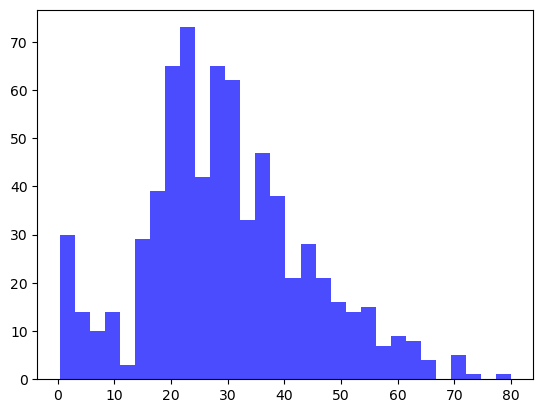

In [145]:
plt.hist(data['Age'],bins=30, color='blue', alpha=0.7)

In [146]:
xtrain['Age'] = xtrain.groupby('Sex')['Age'].transform(lambda x: x.fillna(x.median()))



In [147]:
sex_age= xtrain.groupby('Sex')['Age'].median()
sex_age

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [148]:
med_age_male =sex_age[1]
med_age_female=sex_age[0]

C:\Users\Cyber\AppData\Local\Temp\ipykernel_16424\3180534489.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  med_age_male =sex_age[1]
C:\Users\Cyber\AppData\Local\Temp\ipykernel_16424\3180534489.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  med_age_female=sex_age[0]


In [149]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 331 to 102
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  712 non-null    int64  
 1   Age     712 non-null    float64
 2   SibSp   712 non-null    int64  
 3   Parch   712 non-null    int64  
 4   Sex     712 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 33.4+ KB


In [150]:
xtest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 709 to 10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  179 non-null    int64  
 1   Age     142 non-null    float64
 2   SibSp   179 non-null    int64  
 3   Parch   179 non-null    int64  
 4   Sex     179 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 8.4+ KB


In [157]:
xtest

,Pclass,Age,SibSp,Parch,Sex
709,3,NaN,1,1,male
439,2,31.0,0,0,male
840,3,20.0,0,0,male
720,2,6.0,0,1,female
39,3,14.0,1,0,female
...,...,...,...,...,...
433,3,17.0,0,0,male
773,3,NaN,0,0,male
25,3,38.0,1,5,female
84,2,17.0,0,0,female


In [158]:
for index, row in xtest.iterrows():
    if pd.isnull(row['Age']) and row['Sex']=='male':
        xtest.at[index, 'Age'] = med_age_male
    elif pd.isnull(row['Age']) and row['Sex']=='female':
        xtest.at[index, 'Age'] = med_age_female

In [159]:
xtest

,Pclass,Age,SibSp,Parch,Sex
709,3,29.0,1,1,male
439,2,31.0,0,0,male
840,3,20.0,0,0,male
720,2,6.0,0,1,female
39,3,14.0,1,0,female
...,...,...,...,...,...
433,3,17.0,0,0,male
773,3,29.0,0,0,male
25,3,38.0,1,5,female
84,2,17.0,0,0,female


In [165]:
xtrain

,Pclass,Age,SibSp,Parch,Sex
331,1,45.5,0,0,1.0
733,2,23.0,0,0,1.0
382,3,32.0,0,0,1.0
704,3,26.0,1,0,1.0
813,3,6.0,4,2,0.0
...,...,...,...,...,...
106,3,21.0,0,0,0.0
270,1,29.0,0,0,1.0
860,3,41.0,2,0,1.0
435,1,14.0,1,2,0.0


In [164]:
encoder=OneHotEncoder(sparse_output=False, drop='first')
encoded_sex_train=encoder.fit_transform(xtrain[['Sex']])
xtrain['Sex']=encoded_sex_train


In [168]:
encoded_sex_test=encoder.transform(xtest[['Sex']])
xtest['Sex']=encoded_sex_test
xtest

,Pclass,Age,SibSp,Parch,Sex
709,3,29.0,1,1,1.0
439,2,31.0,0,0,1.0
840,3,20.0,0,0,1.0
720,2,6.0,0,1,0.0
39,3,14.0,1,0,0.0
...,...,...,...,...,...
433,3,17.0,0,0,1.0
773,3,29.0,0,0,1.0
25,3,38.0,1,5,0.0
84,2,17.0,0,0,0.0


<Axes: >

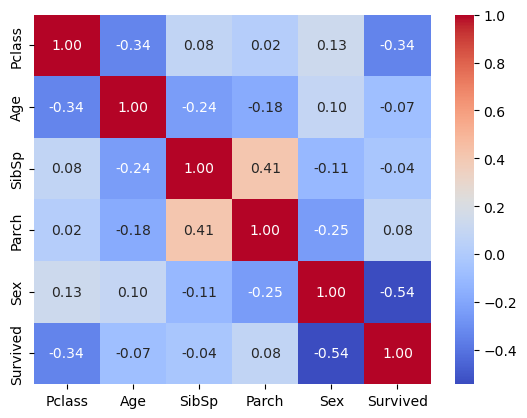

In [170]:
X_full = pd.concat([xtrain, xtest], axis=0)
Y_full = pd.concat([ytrain, ytest], axis=0)
full=X_full
full['Survived'] = Y_full.values
corr=full.corr() 
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')


In [171]:
model = LogisticRegression()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
accuracy = accuracy_score(ytest, ypred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.82
